In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from string import ascii_letters
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('State_County_All_Table.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251 entries, 0 to 3250
Columns: 243 entries, Unnamed: 0 to Unnamed: 242
dtypes: object(243)
memory usage: 6.0+ MB


In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Beneficiary Demographic Characteristics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Total Costs,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Service-Level Costs and Utilization,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Readmissions and ED Visits,Unnamed: 215,Unnamed: 216,Unnamed: 217,Prevention Quality Indicators,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242
0,State,County,State and County FIPS Code,Beneficiaries with Part A and Part B,FFS Beneficiaries,MA Beneficiaries,MA Participation Rate,Average Age,Percent Female,Percent Male,Percent Non-Hispanic White,Percent African American,Percent Hispanic,Percent Other/Unknown,Percent Eligible for Medicaid,Average HCC Score,Total Actual Costs,Total Standardized Costs,Total Standardized Risk-Adjusted Costs,Actual Per Capita Costs,Standardized Per Capita Costs,Standardized Risk-Adjusted Per Capita Costs,IP Actual Costs,IP Actual Costs as % of Total Actual Costs,IP Per Capita Actual Costs,IP Per User Actual Costs,IP Standardized Costs,IP Standardized Costs as % of Total Standardiz...,IP Per Capita Standardized Costs,IP Per User Standardized Costs,IP Users (with a covered stay),% of Beneficiaries Using IP,IP Covered Stays Per 1000 Beneficiaries,IP Covered Days Per 1000

In [6]:
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(df.index[0]))
df = df.reset_index(drop = True)

In [7]:
df.columns = map(str.lower, df.columns)

In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df = df[~df.county.str.contains('STATE TOTAL')]

In [10]:
df = df[~df.county.str.contains('NATIONAL TOTAL')]

In [13]:
df = df.replace({'%':''}, regex = True)

In [14]:
df = df.replace({'\*':'0'}, regex = True)

In [15]:
df = df.replace({'\$':''}, regex = True)

In [17]:
df = df.apply(pd.to_numeric, errors='ignore')

In [19]:
df_dem = df[df.columns[:14]]

In [27]:
df_dem = df_dem.replace({',':''}, regex = True)

In [29]:
df_dem = df_dem.apply(pd.to_numeric, errors='ignore')

In [11]:
county_fips = {}

x=0
while x < len(df):
    county = df['county'].iloc[x]
    fips = df['state_and_county_fips_code'].iloc[x]
    county_fips[county] = fips
    x = x+1

In [12]:
df = df.drop('state_and_county_fips_code', axis = 1)

In [18]:
df['fips_code'] = df['county'].map(county_fips)

In [20]:
df_dem.insert(loc = 2, column = 'fips_code', value = df['fips_code'])

In [30]:
df_dem.head()

,state,county,fips_code,beneficiaries_with_part_a_and_part_b,ffs_beneficiaries,ma_beneficiaries,ma_participation_rate,average_age,percent_female,percent_male,percent_non-hispanic_white,percent_african_american,percent_hispanic,percent_other/unknown,percent_eligible_for_medicaid
2,AK,Aleutians East,2013.0,110,110,0,0.00,72,44.55,55.45,0.00,0.00,0.00,0.00,19.09
3,AK,Aleutians West,2016.0,0,142,0,0.00,70,50.00,50.00,0.00,0.00,0.00,0.00,23.24
4,AK,Anchorage,2020.0,30394,30037,357,1.17,70,52.69,47.31,70.97,5.28,4.22,19.53,23.92
5,AK,Bethel,2050.0,0,1140,0,0.00,71,49.87,50.13,0.00,0.00,0.00,0.00,58.51
6,AK,Bristol Bay,2060.0,103,103,0,0.00,74,46.60,53.40,48.54,0.00,0.00,51.46,17.48


In [31]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 2 to 3249
Data columns (total 15 columns):
state                                   3196 non-null object
county                                  3196 non-null object
fips_code                               3145 non-null float64
beneficiaries_with_part_a_and_part_b    3196 non-null int64
ffs_beneficiaries                       3196 non-null int64
ma_beneficiaries                        3196 non-null int64
ma_participation_rate                   3196 non-null float64
average_age                             3196 non-null int64
percent_female                          3196 non-null float64
percent_male                            3196 non-null float64
percent_non-hispanic_white              3196 non-null float64
percent_african_american                3196 non-null float64
percent_hispanic                        3196 non-null float64
percent_other/unknown                   3196 non-null float64
percent_eligible_for_medicaid      

In [38]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [78]:
df_dem.to_csv('demographic.csv', index=False)

In [ ]:
sns.pairplot(df_dem)

ValueError: color kwarg must have one color per dataset

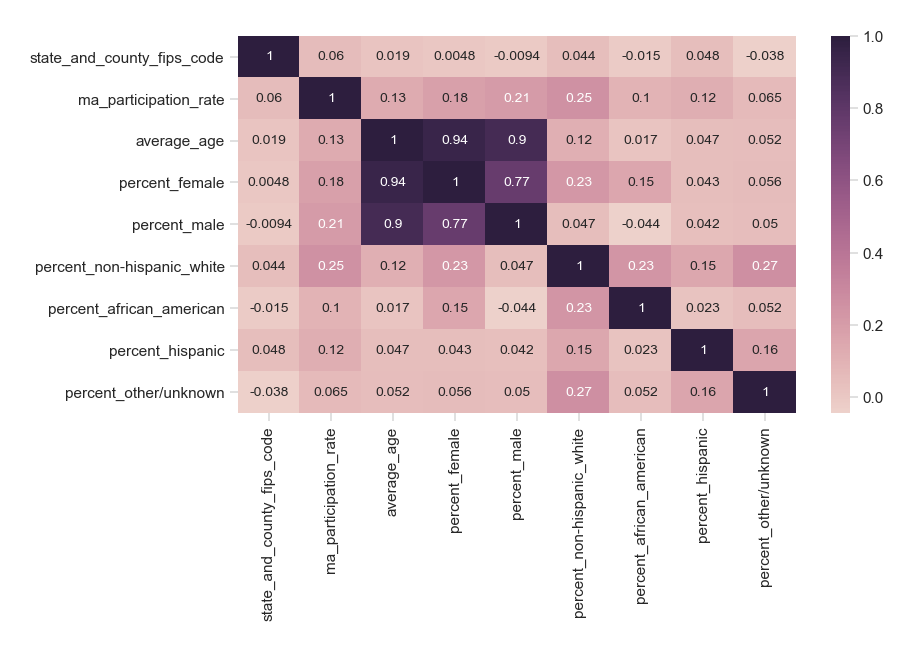

In [20]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_dem.corr(), annot=True, xticklabels=True, yticklabels=True,
            cmap=sns.cubehelix_palette(as_cmap=True))